In [3]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Tue Mar  2 09:13:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 44%   84C    P2   180W / 250W |  10919MiB / 10989MiB |     64%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 30%   43C    P8    15W / 250W |    165MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [4]:
import torch
torch.cuda.set_device(2)

In [5]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='efficientnet_b2'),
    MixUp(),
]

In [9]:
learn = timm_learner(dls512, 'efficientnet_b2',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [10]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.107023,0.652100,0.695836,0.747126,0.656566,00:29


Better model found at epoch 0 with valid_loss value: 0.6520996689796448.


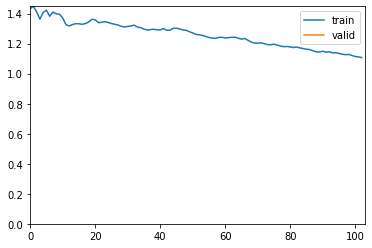

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.960034,0.636505,0.697043,0.758300,0.640853,00:34
1,0.928190,0.618291,0.706095,0.765789,0.653199,00:34
2,0.930145,0.611765,0.712130,0.770942,0.661055,00:34
3,0.924122,0.602619,0.710320,0.775100,0.649832,00:34
4,0.918478,0.602189,0.716958,0.783602,0.654321,00:34
5,0.923975,0.598640,0.717562,0.798307,0.635241,00:34
6,0.898556,0.575631,0.721183,0.785619,0.662177,00:34
7,0.867172,0.564758,0.726011,0.792503,0.664422,00:34
8,0.863191,0.571662,0.716958,0.785908,0.650954,00:34
9,0.890732,0.559668,0.725407,0.785340,0.673401,00:34


Better model found at epoch 0 with valid_loss value: 0.6365048289299011.


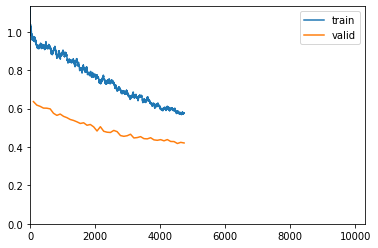

Better model found at epoch 1 with valid_loss value: 0.618291437625885.
Better model found at epoch 2 with valid_loss value: 0.6117652058601379.
Better model found at epoch 3 with valid_loss value: 0.6026194095611572.
Better model found at epoch 4 with valid_loss value: 0.6021891832351685.
Better model found at epoch 5 with valid_loss value: 0.5986401438713074.
Better model found at epoch 6 with valid_loss value: 0.5756314992904663.
Better model found at epoch 7 with valid_loss value: 0.5647580623626709.
Better model found at epoch 9 with valid_loss value: 0.5596675872802734.
Better model found at epoch 10 with valid_loss value: 0.5528610944747925.
Better model found at epoch 11 with valid_loss value: 0.5433116555213928.
Better model found at epoch 12 with valid_loss value: 0.5382656455039978.
Better model found at epoch 13 with valid_loss value: 0.5311278104782104.
Better model found at epoch 14 with valid_loss value: 0.5226140022277832.
Better model found at epoch 16 with valid_loss 

In [11]:
learn.fine_tune(100,base_lr=1e-4)

In [ ]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [10]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

Could not do one pass in your dataloader, there is something wrong in it


In [11]:
learn.freeze()

In [12]:
learn.dls=dls512

In [14]:
#learn.load('hrnet')

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

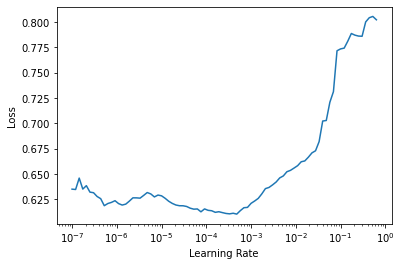

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.575477,0.424273,0.780326,0.834816,0.737374,00:29


Better model found at epoch 0 with valid_loss value: 0.42427289485931396.


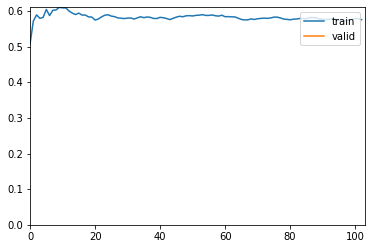

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.584525,0.421412,0.782136,0.824755,0.755331,00:34
1,0.595300,0.422667,0.774894,0.823750,0.739618,00:34
2,0.581222,0.428742,0.781533,0.843061,0.729517,00:35
3,0.579361,0.424893,0.773687,0.824937,0.735129,00:35


Better model found at epoch 0 with valid_loss value: 0.4214116930961609.


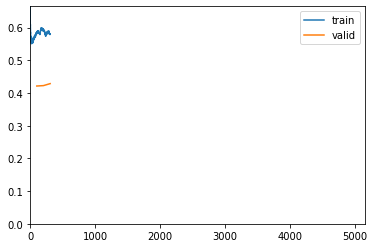

No improvement since epoch 0: early stopping


In [12]:
learn.fine_tune(50,base_lr=1e-5)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5843520760536194.


(#4) [0.7186765670776367,0.5843520760536194,0.59958071278826,0.6574712643678161]